In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from sketch_rnn import Trainer, HParams

#use_wandb = True

hp = HParams()
hp.use_recurrent_dropout=True
hp.r_dropout_prob = 0.1


# hp.augment_stroke_prob = 0.1
# hp.use_random_scale = False
# hp.random_scale_factor = 0.15

# # adding these at same time as augmentation - TODO test separately
hp.use_lr_decay = True
# hp.use_eta = True

hp.dataset_name = 'epoch20240104_trainval09'

hp.max_seq_length = 250


# hp.dataset_name = 'epoch-20231214-trainval'
# hp.dataset_name = 'v2-splice-maxstrokes5'
# hp.dataset_name = 'look_i16'
# hp.dataset_name = 'look_f16'

hp.__dict__()


{'architecture': 'Pytorch-SketchRNN',
 'dataset_source': 'look',
 'dataset_name': 'epoch20240104_trainval09',
 'epochs': 50000,
 'save_every_n_epochs': 100,
 'lr': 0.001,
 'use_lr_decay': True,
 'min_lr': 1e-05,
 'lr_decay': 0.9999,
 'use_recurrent_dropout': True,
 'r_dropout_prob': 0.1,
 'use_layer_norm': True,
 'layer_norm_learnable': False,
 'augment_stroke_prob': 0.1,
 'use_random_scale': True,
 'random_scale_factor': 0.15,
 'lstm_impl': 'custom',
 'enc_hidden_size': 256,
 'dec_hidden_size': 512,
 'batch_size': 100,
 'd_z': 128,
 'n_distributions': 20,
 'kl_div_loss_weight': 0.5,
 'use_eta': False,
 'eta_min': 0.01,
 'eta_R': 0.99995,
 'grad_clip': 1.0,
 'temperature': 0.4,
 'max_seq_length': 250}

In [3]:
from sketch_rnn import Trainer, HParams

# hp = HParams()
# hp.learning_rate = 1e-3

trainer = Trainer(hp=hp, use_wandb=False, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

RUN_ID: 0469535

HYPERPARAMETERS:

{
  "architecture": "Pytorch-SketchRNN",
  "dataset_source": "look",
  "dataset_name": "epoch20240104_trainval09",
  "epochs": 50000,
  "save_every_n_epochs": 100,
  "lr": 0.001,
  "use_lr_decay": true,
  "min_lr": 1e-05,
  "lr_decay": 0.9999,
  "use_recurrent_dropout": true,
  "r_dropout_prob": 0.1,
  "use_layer_norm": true,
  "layer_norm_learnable": false,
  "augment_stroke_prob": 0.1,
  "use_random_scale": true,
  "random_scale_factor": 0.15,
  "lstm_impl": "custom",
  "enc_hidden_size": 256,
  "dec_hidden_size": 512,
  "batch_size": 100,
  "d_z": 128,
  "n_distributions": 20,
  "kl_div_loss_weight": 0.5,
  "use_eta": false,
  "eta_min": 0.01,
  "eta_R": 0.99995,
  "grad_clip": 1.0,
  "temperature": 0.4,
  "max_seq_length": 250
}


finished filtering - len(dataset) = 2100, len(data) = 2100
finished filtering - len(dataset) = 337, len(data) = 337


In [5]:
trainer.run_id = '24mzu9rc'
trainer.run_dir = trainer.models_dir / trainer.run_id

In [134]:
trainer.load(epoch=1400)

In [9]:
trainer.sample(epoch=301, display=True)

([PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0056_orig.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0068_orig.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0101_orig.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0153_orig.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0261_orig.png')],
 [PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0056_decoded.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0068_decoded.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0101_decoded.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0153_decoded.png'),
  PosixPath('models/24mzu9rc/runid-24mzu9rc_epoch-00301_sample-0261_decoded.png')])

In [135]:
encoder = trainer.encoder
decoder = trainer.decoder

In [136]:
train_ds = trainer.train_dataset

In [137]:
train_ds[0][0]

tensor([[ 0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 1.9672,  1.0369,  1.0000,  0.0000,  0.0000],
        [-0.5270,  0.6296,  1.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000]])

In [138]:
sampler = trainer.sampler

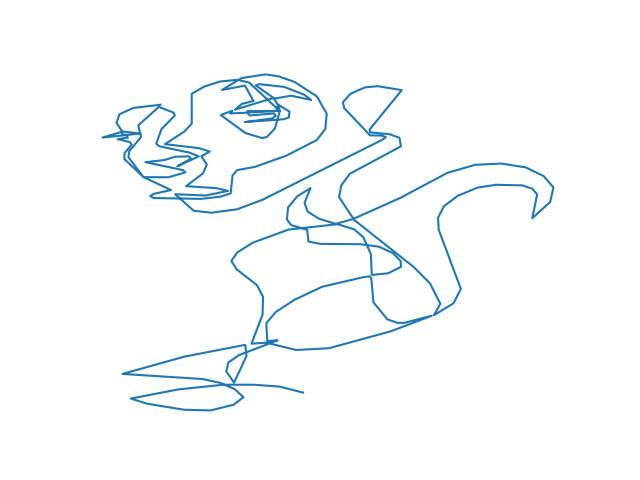

In [139]:
sampler.plot(train_ds[0][0][2:], 'test.png')

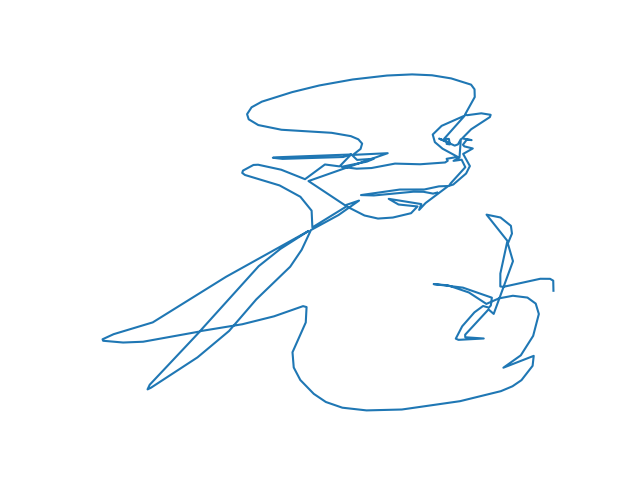

In [140]:
sampler.plot(train_ds[1][0][2:], 'test.png')

In [141]:
data = train_ds[0][0].unsqueeze(1)
z, _, _ = encoder(data)

In [142]:
len(data)

252

In [143]:
data2 = train_ds[1][0].unsqueeze(1)
z2, _, _ = encoder(data2)
len(data2)

252

In [144]:
longest_seq_len = len(data)

In [145]:
z

tensor([[-3.7790e-01,  9.6061e-01, -8.8631e-01, -7.4359e-01,  9.3663e-01,
         -5.8355e-01, -1.1366e+00,  1.2690e-02, -8.0981e-01, -9.0349e-01,
          1.0140e+00,  7.5137e-01,  1.8669e-01, -4.8449e-02,  4.4514e-01,
         -1.0270e+00,  3.2760e-01,  4.6783e-01,  4.3849e-01, -1.0620e-01,
         -1.0188e+00, -1.4944e+00,  6.9765e-01,  1.2396e+00,  1.8711e-01,
         -1.3234e-01,  1.2382e+00,  6.8178e-01, -1.2422e+00,  6.2931e-01,
          1.8722e-01,  2.3228e+00,  1.2171e+00,  3.6234e-01, -2.1343e-01,
         -7.5433e-01, -1.0587e+00,  3.8684e-01, -1.3775e-01, -4.9102e-01,
          1.4384e-01, -4.8146e-01, -3.4073e-01,  1.3074e+00, -1.6965e+00,
          9.2100e-01, -2.0843e-02, -1.0077e+00,  7.4839e-01, -5.1015e-01,
         -1.9975e-01, -3.0582e-01,  4.6869e-01, -6.4902e-01, -5.2377e-02,
         -5.8632e-01, -1.2627e+00,  1.7185e+00, -2.0078e-01, -3.2091e-01,
          1.7947e-02, -1.1325e+00,  3.4101e-01, -1.7139e+00, -2.7426e-01,
         -3.1202e-01, -3.1012e-01,  1.

In [146]:
z.shape

torch.Size([1, 128])

In [147]:
temperature = 0.1

def decode(z, data, temperature=0.4, longest_seq_len=252):
    s = data.new_tensor([0, 0, 1, 0, 0])
    seq = [s]
    # Initial decoder is `None`.
    # The decoder will initialize it to $[h_0; c_0] = \tanh(W_{z}z + b_z)$
    state = None
    
    # We don't need gradients
    with torch.no_grad():
        # Sample $N_{max}$ strokes
        for i in range(longest_seq_len):
            # $[(\Delta x, \Delta y, p_1, p_2, p_3); z]$ is the input to the decoder
            data = torch.cat([s.view(1, 1, -1), z.unsqueeze(0)], 2)
            # Get $\Pi$, $\mathcal{N}(\mu_{x}, \mu_{y}, \sigma_{x}, \sigma_{y}, \rho_{xy})$,
            # $q$ and the next state from the decoder
            dist, q_logits, state = decoder(data, z, state)
            # Sample a stroke
            s = sampler._sample_step(dist, q_logits, temperature)
            # Add the new stroke to the sequence of strokes
            seq.append(s)
            # Stop sampling if $p_3 = 1$. This indicates that sketching has stopped
            if s[4] == 1:
                break
    
    # Create a PyTorch tensor of the sequence of strokes
    seq = torch.stack(seq)
    return seq

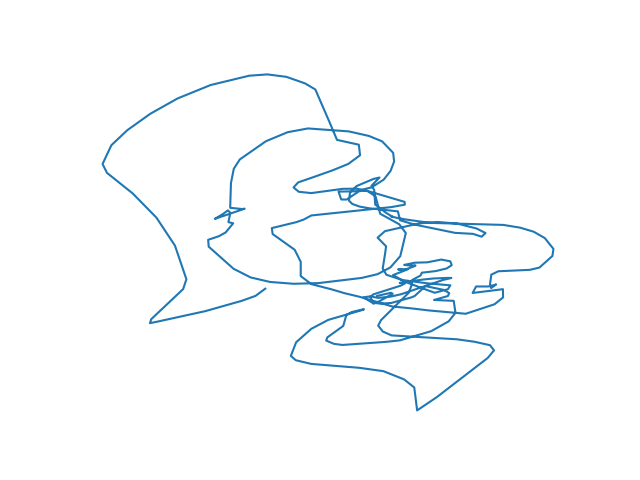

In [163]:
seq = decode(z2, data2, temperature=0.01, longest_seq_len=longest_seq_len)
sampler.plot(seq[2:], 'test.png')

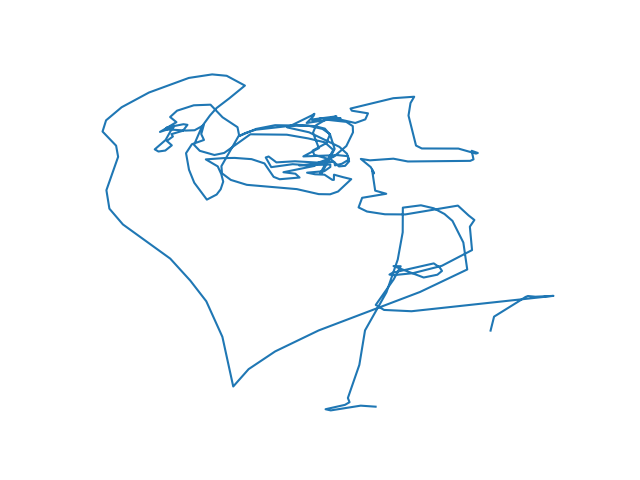

In [165]:
seq = decode(z2, data2, temperature=0.01, longest_seq_len=longest_seq_len)
sampler.plot(seq[2:], 'test2.png')

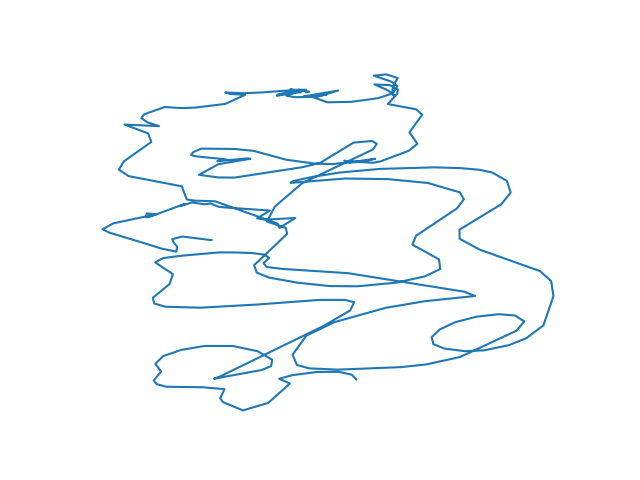

In [166]:
seq = decode(z2, data2, temperature=0.01, longest_seq_len=longest_seq_len)
sampler.plot(seq[2:], 'test3.png')

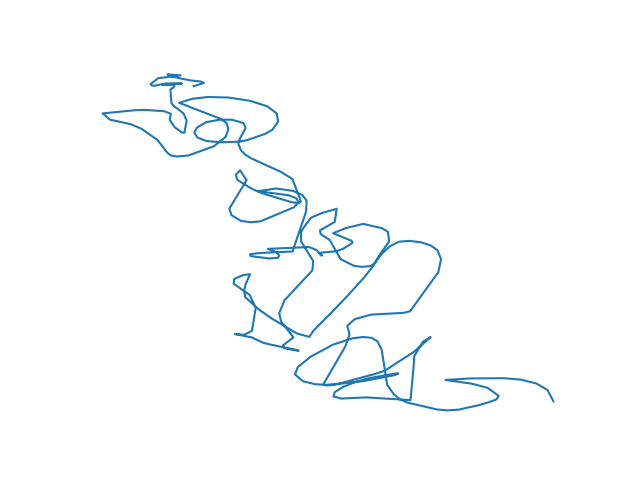

In [167]:
seq = decode(z, data, temperature=0.01, longest_seq_len=longest_seq_len)
sampler.plot(seq[2:], 'test4.png')

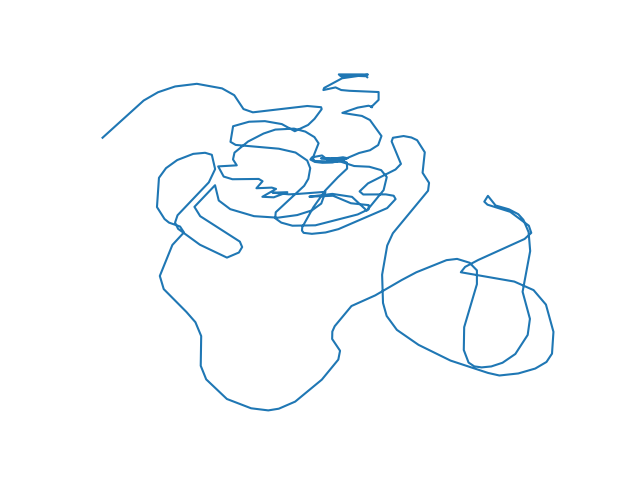

In [178]:
seq = decode(z, data, temperature=0.01, longest_seq_len=longest_seq_len)
sampler.plot(seq[2:], 'test5.png')